<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(3_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n20.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,66.351441,97.926449,822.196691,996.474581,417.006807,579.467774
1,0.0,1.0,84.107038,45.665056,-949.182573,-809.410479,120.384627,-929.795106
2,0.0,2.0,68.358149,60.531338,493.038872,631.928359,192.555533,439.372826
3,0.0,3.0,52.001557,23.303357,13.522325,98.827239,-51.834378,150.661617
4,0.0,4.0,82.992735,59.579300,324.892600,477.464635,203.480626,273.984010
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,38.974523,79.902376,-171.090139,-42.213240,290.699393,-332.912633
119996,999.0,116.0,74.594377,25.399666,-12.087237,97.906806,-45.977729,143.884534
119997,999.0,117.0,49.945427,75.199090,1076.454624,1211.599141,237.292751,974.306390
119998,999.0,118.0,37.381506,29.980790,-36.002343,41.359953,87.845977,-46.486024


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,66.351441,97.926449,822.196691,996.474581,417.006807,579.467774
1,0.0,1.0,84.107038,45.665056,-949.182573,-809.410479,120.384627,-929.795106
2,0.0,2.0,68.358149,60.531338,493.038872,631.928359,192.555533,439.372826
3,0.0,3.0,52.001557,23.303357,13.522325,98.827239,-51.834378,150.661617
4,0.0,4.0,82.992735,59.579300,324.892600,477.464635,203.480626,273.984010
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,38.974523,79.902376,-171.090139,-42.213240,290.699393,-332.912633
119996,999.0,116.0,74.594377,25.399666,-12.087237,97.906806,-45.977729,143.884534
119997,999.0,117.0,49.945427,75.199090,1076.454624,1211.599141,237.292751,974.306390
119998,999.0,118.0,37.381506,29.980790,-36.002343,41.359953,87.845977,-46.486024


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    66.351441  97.926449   822.196691   996.474581  417.006807   
      1.0    84.107038  45.665056  -949.182573  -809.410479  120.384627   
      2.0    68.358149  60.531338   493.038872   631.928359  192.555533   
      3.0    52.001557  23.303357    13.522325    98.827239  -51.834378   
      4.0    82.992735  59.579300   324.892600   477.464635  203.480626   
...                ...        ...          ...          ...         ...   
999.0 115.0  38.974523  79.902376  -171.090139   -42.213240  290.699393   
      116.0  74.594377  25.399666   -12.087237    97.906806  -45.977729   
      117.0  49.945427  75.199090  1076.454624  1211.599141  237.292751   
      118.0  37.381506  29.980790   -36.002343    41.359953   87.845977   
      119.0  26.367426  71.578969 -1066.200131  -958.253736  294.936660   

                   e_hat  
rep   index               
0.0   0.0     579.467774  
      1.0    -929.795106  
      2.0     439.372826  
      3.0     150.661617  
      4.0     273.984010  
...                  ...  
999.0 115.0  -332.912633  
      116.0   143.884534  
      117.0   974.306390  
      118.0   -46.486024  
      119.0 -1253.190396  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    66.351441  97.926449   822.196691   996.474581  417.006807   
      1.0    84.107038  45.665056  -949.182573  -809.410479  120.384627   
      2.0    68.358149  60.531338   493.038872   631.928359  192.555533   
      3.0    52.001557  23.303357    13.522325    98.827239  -51.834378   
      4.0    82.992735  59.579300   324.892600   477.464635  203.480626   
...                ...        ...          ...          ...         ...   
999.0 115.0  38.974523  79.902376  -171.090139   -42.213240  290.699393   
      116.0  74.594377  25.399666   -12.087237    97.906806  -45.977729   
      117.0  49.945427  75.199090  1076.454624  1211.599141  237.292751   
      118.0  37.381506  29.980790   -36.002343    41.359953   87.845977   
      119.0  26.367426  71.578969 -1066.200131  -958.253736  294.936660   

                   e_hat  
rep   index               
0.0   0.0     579.467774  
      1.0    -929.795106  
      2.0     439.372826  
      3.0     150.661617  
      4.0     273.984010  
...                  ...  
999.0 115.0  -332.912633  
      116.0   143.884534  
      117.0   974.306390  
      118.0   -46.486024  
      119.0 -1253.190396  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,66.351441,97.926449,822.196691,996.474581,417.006807,579.467774
1,0.0,1.0,84.107038,45.665056,-949.182573,-809.410479,120.384627,-929.795106
2,0.0,2.0,68.358149,60.531338,493.038872,631.928359,192.555533,439.372826
3,0.0,3.0,52.001557,23.303357,13.522325,98.827239,-51.834378,150.661617
4,0.0,4.0,82.992735,59.579300,324.892600,477.464635,203.480626,273.984010
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,38.974523,79.902376,-171.090139,-42.213240,290.699393,-332.912633
119996,999.0,116.0,74.594377,25.399666,-12.087237,97.906806,-45.977729,143.884534
119997,999.0,117.0,49.945427,75.199090,1076.454624,1211.599141,237.292751,974.306390
119998,999.0,118.0,37.381506,29.980790,-36.002343,41.359953,87.845977,-46.486024


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    66.351441  97.926449   822.196691   996.474581  417.006807   
      1.0    84.107038  45.665056  -949.182573  -809.410479  120.384627   
      2.0    68.358149  60.531338   493.038872   631.928359  192.555533   
      3.0    52.001557  23.303357    13.522325    98.827239  -51.834378   
      4.0    82.992735  59.579300   324.892600   477.464635  203.480626   
...                ...        ...          ...          ...         ...   
999.0 115.0  38.974523  79.902376  -171.090139   -42.213240  290.699393   
      116.0  74.594377  25.399666   -12.087237    97.906806  -45.977729   
      117.0  49.945427  75.199090  1076.454624  1211.599141  237.292751   
      118.0  37.381506  29.980790   -36.002343    41.359953   87.845977   
      119.0  26.367426  71.578969 -1066.200131  -958.253736  294.936660   

                   e_hat  
rep   index               
0.0   0.0     579.467774  
      1.0    -929.795106  
      2.0     439.372826  
      3.0     150.661617  
      4.0     273.984010  
...                  ...  
999.0 115.0  -332.912633  
      116.0   143.884534  
      117.0   974.306390  
      118.0   -46.486024  
      119.0 -1253.190396  

[120000 rows x 6 columns]

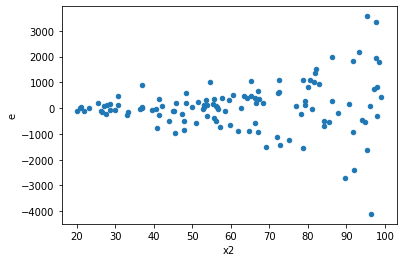

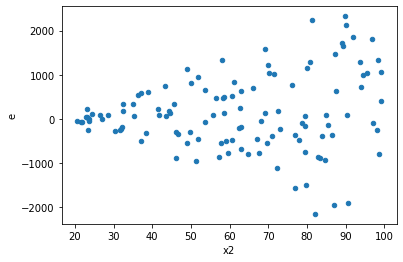

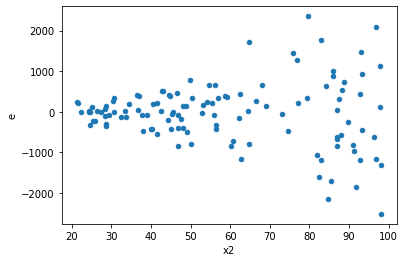

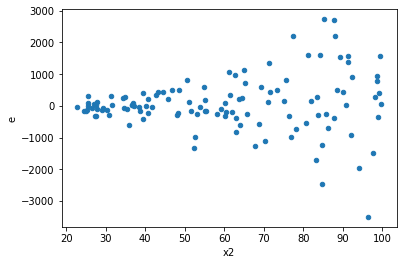

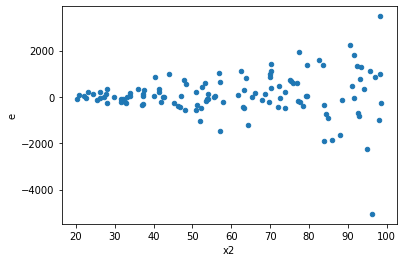

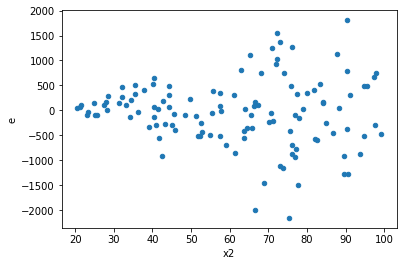

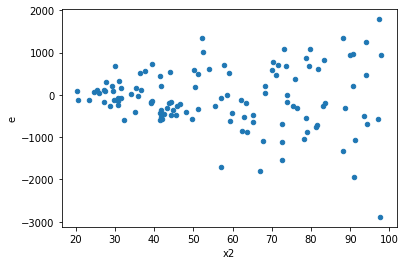

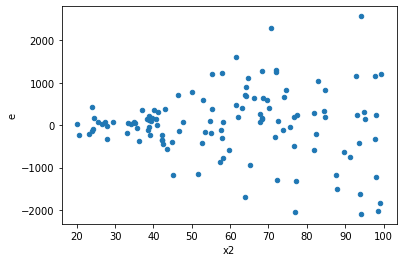

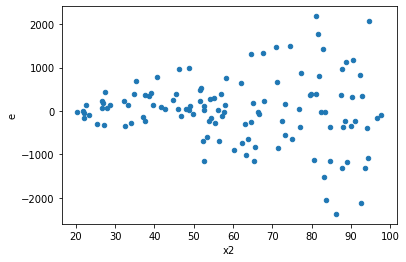

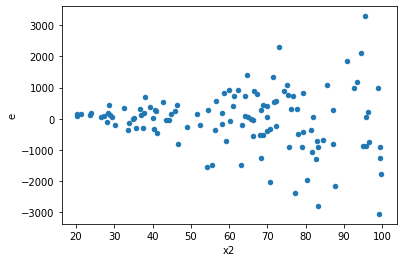

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,5490558.137772948,96821805.44240464,119359.95951680321,2104821.857443579,17.63423736037098,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,8946827.001329798,49679200.38735711,194496.23915934344,1079982.617116459,5.5527172236562885,4.2928706811551365e-08,0.9999999785356466,2.1464353405775682e-08,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,11396766.499000955,53475921.41973422,247755.7934565425,1162520.0308637873,4.692201197982071,6.175138724806573e-07,0.9999996912430638,3.0875693624032863e-07,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,14361344.9910254,47733824.36362988,312203.15197881305,1037691.8339919539,3.32377116443198,8.18544228411433e-05,0.9999590727885794,4.092721142057165e-05,Reject001=0 : Heteroscedasticity
10.0,46.0,46.0,4173134.792942561,63362400.48510687,90720.32158570785,1377443.488806671,15.183406151237394,4.440892098500626e-16,0.9999999999999998,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
11.0,46.0,46.0,38957728.87238477,51240977.8729526,846907.1493996689,1113934.3015859262,1.3152968449676448,0.35604818662903215,0.8219759066854839,0.17802409331451607,Reject001=1 : Homoscedasticity
12.0,46.0,46.0,8816220.792060468,30890561.462082386,191656.97374044496,671533.9448278779,3.5038325594001885,4.0918341111195744e-05,0.9999795408294444,2.0459170555597872e-05,Reject001=0 : Heteroscedasticity
13.0,46.0,46.0,3376142.167019721,64689299.78563388,73394.39493521133,1406289.1257746494,19.160715569847625,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
14.0,46.0,46.0,24006351.062284,24679740.872385066,521877.1970061739,536516.1059214144,1.0280504858216049,0.9256618873921036,0.5371690563039482,0.4628309436960518,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,5490558.137772948,96821805.44240464,119359.95951680321,2104821.857443579,17.63423736037098,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,8946827.001329798,49679200.38735711,194496.23915934344,1079982.617116459,5.5527172236562885,4.2928706811551365e-08,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,42901945.409349106,7271778.807954629,932650.9871597632,158082.1479990137,0.16949764721788066,1.5795658557715356e-08,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,11396766.499000955,53475921.41973422,247755.7934565425,1162520.0308637873,4.692201197982071,6.175138724806573e-07,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,14361344.9910254,47733824.36362988,312203.15197881305,1037691.8339919539,3.32377116443198,8.18544228411433e-05,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,24010115.387434192,15756645.881987594,521959.03016161284,342535.78004320856,0.6562503189898833,0.15692473684141472,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,36924229.27416305,8633636.486143121,802700.6363948489,187687.7496987635,0.23382035741459134,2.4876429445418585e-06,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,31702363.293918774,24980897.80915258,689181.8107373647,543062.995851143,0.7879821948146205,0.42213406517163937,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,30649744.25676298,19424305.193316936,666298.7881904996,422267.50420254207,0.6337509713162088,0.12557890913046532,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    741
Reject001=1 : Homoscedasticity      259
Name: Result_test, dtype: int64